In [2]:
using MLJ 
using Plots
using Random 
Random.seed!(42)

TaskLocalRNG()

In [3]:
X, y = make_regression(500, 5; rng=42)

(Tables.MatrixTable{Matrix{Float64}} with 500 rows, 5 columns, and schema:
 :x1  Float64
 :x2  Float64
 :x3  Float64
 :x4  Float64
 :x5  Float64, [0.4505085886610386, -1.4630505879087143, 2.694771136742658, 2.6646384235670735, -0.9876991361565962, 1.9991358307111402, 0.65449568831838, 3.345536049709873, -2.148950212445011, 6.191138011922071  …  -1.8310022780632365, 1.674982471593387, -1.1395777456843432, -3.2385612357609554, 0.4843977816823668, 1.7084543901808904, 1.7757511288709875, -0.866779408252546, 5.456104458341165, 1.5933554582868956])

In [4]:
using Pkg
Pkg.add("Measurements")
Pkg.add("ForwardDiff")
Pkg.add("Zygote")
Pkg.add("MLJModelInterface")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/gitRepos/AerialVehicle.jl/Project.toml`
  No Changes to `~/gitRepos/AerialVehicle.jl/Manifest.toml`
   Resolving package versions...
  No Changes to `~/gitRepos/AerialVehicle.jl/Project.toml`
  No Changes to `~/gitRepos/AerialVehicle.jl/Manifest.toml`
   Resolving package versions...
  No Changes to `~/gitRepos/AerialVehicle.jl/Project.toml`
  No Changes to `~/gitRepos/AerialVehicle.jl/Manifest.toml`
   Resolving package versions...
  No Changes to `~/gitRepos/AerialVehicle.jl/Project.toml`
  No Changes to `~/gitRepos/AerialVehicle.jl/Manifest.toml`


# Using Measurements

In [5]:
using Measurements

Let's try fitting a `NeuralNetworkRegressor` Model and see if we can make measurements work with it

In [6]:
using MLJFlux
using Flux 
using MLJModelInterface

NN = @load NeuralNetworkRegressor

import MLJFlux ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /home/john/.julia/packages/MLJModels/GKDnU/src/loading.jl:168


NeuralNetworkRegressor

In [7]:
nn_model = NN(builder=MLJFlux.Short(n_hidden=30, σ=Flux.relu))

NeuralNetworkRegressor(
    builder = Short(
            n_hidden = 30,
            dropout = 0.5,
            σ = NNlib.relu),
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}()),
    loss = Flux.Losses.mse,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    rng = Random._GLOBAL_RNG(),
    optimiser_changes_trigger_retraining = false,
    acceleration = CPU1{Nothing}(nothing))

In [8]:
mach = machine(nn_model, X, y)

Machine{NeuralNetworkRegressor{Short,…},…} trained 0 times; caches data
  args: 
    1:	Source @013 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @638 ⏎ `AbstractVector{Continuous}`


In [9]:
fit!(mach, verbosity=2)

┌ Info: Training Machine{NeuralNetworkRegressor{Short,…},…}.
└ @ MLJBase /home/john/.julia/packages/MLJBase/QXObv/src/machines.jl:403
┌ Info: Loss is 6.082
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 2.645
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 1.348
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 1.148
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 1.068
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 1.036
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 0.9391
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 0.8819
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 0.9834
└ @ MLJFlux /home/john/.julia/packages/MLJFlux/5ENQA/src/core.jl:128
┌ Info: Loss is 0.7837
└ @ MLJFlux /home/joh

Machine{NeuralNetworkRegressor{Short,…},…} trained 1 time; caches data
  args: 
    1:	Source @013 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @638 ⏎ `AbstractVector{Continuous}`


In [10]:


Xtest = rand(20, 5)

20×5 Matrix{Float64}:
 0.406624   0.941049   0.375642   0.676322    0.46644
 0.900236   0.217506   0.56432    0.0924337   0.839926
 0.674209   0.260184   0.0408722  0.603282    0.897492
 0.387191   0.354882   0.770791   0.60305     0.465803
 0.824365   0.626468   0.369766   0.878755    0.141902
 0.639379   0.893678   0.167597   0.0957858   0.778639
 0.205301   0.9156     0.131813   0.248397    0.320782
 0.5125     0.349283   0.284291   0.273886    0.433959
 0.371921   0.741566   0.714285   0.173607    0.964088
 0.528664   0.262873   0.261889   0.794952    0.909774
 0.717721   0.296673   0.512906   0.224814    0.0170752
 0.310608   0.111055   0.229616   0.00479879  0.0259912
 0.923194   0.223065   0.164818   0.320377    0.639053
 0.897241   0.458139   0.212691   0.46423     0.278278
 0.910083   0.111512   0.257899   0.803382    0.463431
 0.0971702  0.335885   0.470519   0.203107    0.612636
 0.412921   0.989335   0.335433   0.24949     0.570007
 0.481233   0.765955   0.675371   0.342691

In [11]:
Xtestpm = Xtest .± 0.005

20×5 Matrix{Measurement{Float64}}:
 0.4066±0.005   0.941±0.005  0.3756±0.005  0.6763±0.005  0.4664±0.005
 0.9002±0.005  0.2175±0.005  0.5643±0.005  0.0924±0.005  0.8399±0.005
 0.6742±0.005  0.2602±0.005  0.0409±0.005  0.6033±0.005  0.8975±0.005
 0.3872±0.005  0.3549±0.005  0.7708±0.005   0.603±0.005  0.4658±0.005
 0.8244±0.005  0.6265±0.005  0.3698±0.005  0.8788±0.005  0.1419±0.005
 0.6394±0.005  0.8937±0.005  0.1676±0.005  0.0958±0.005  0.7786±0.005
 0.2053±0.005  0.9156±0.005  0.1318±0.005  0.2484±0.005  0.3208±0.005
 0.5125±0.005  0.3493±0.005  0.2843±0.005  0.2739±0.005   0.434±0.005
 0.3719±0.005  0.7416±0.005  0.7143±0.005  0.1736±0.005  0.9641±0.005
 0.5287±0.005  0.2629±0.005  0.2619±0.005   0.795±0.005  0.9098±0.005
 0.7177±0.005  0.2967±0.005  0.5129±0.005  0.2248±0.005  0.0171±0.005
 0.3106±0.005  0.1111±0.005  0.2296±0.005  0.0048±0.005   0.026±0.005
 0.9232±0.005  0.2231±0.005  0.1648±0.005  0.3204±0.005  0.6391±0.005
 0.8972±0.005  0.4581±0.005  0.2127±0.005  0.4642±0.005

In [12]:
predict(mach, Xtestpm)

LoadError: MethodError: no method matching reformat(::Matrix{Measurement{Float64}}, ::Type{AbstractMatrix{Continuous}})
[0mClosest candidates are:
[0m  reformat(::Any) at ~/.julia/packages/MLJFlux/5ENQA/src/core.jl:168
[0m  reformat(::Any, [91m::Type{<:Table}[39m) at ~/.julia/packages/MLJFlux/5ENQA/src/core.jl:173
[0m  reformat(::Any, [91m::Type{<:GrayImage}[39m) at ~/.julia/packages/MLJFlux/5ENQA/src/core.jl:178
[0m  ...

To make our `NeuralNetworkRegressors` implemented via `MLJFlux.jl` work with `Measurements.jl`, we need to define how to `reformat()` a table of measurements

In [13]:
MLJFlux.reformat(X::Matrix{Measurement{Float64}}, ::Type{AbstractMatrix{Continuous}}) = MLJModelInterface.matrix(X, transpose=true)

In [14]:
methods(reformat)

# 1 method for generic function "reformat":
[1] reformat(model::Model, args...) in MLJModelInterface at /home/john/.julia/packages/MLJModelInterface/txhfr/src/model_api.jl:73

In [15]:
predict(mach, Xtestpm)

20-element Vector{Measurement{Float64}}:
 -2.018 ± 0.012
 -1.793 ± 0.011
 -1.714 ± 0.011
 -2.519 ± 0.012
 -1.829 ± 0.011
 -1.225 ± 0.011
 -0.982 ± 0.011
 -1.261 ± 0.011
 -2.456 ± 0.012
  -2.35 ± 0.011
 -1.093 ± 0.011
 -0.364 ± 0.016
 -1.233 ± 0.012
 -1.163 ± 0.011
  -1.81 ± 0.011
  -1.75 ± 0.012
 -1.531 ± 0.012
 -2.103 ± 0.012
 -1.793 ± 0.012
 -1.901 ± 0.012

# Using (insert AutoDiff package here)

Let's confirm that we understand how this works... `Meaurements.jl` uses [linear error propogation theory](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Essentially this means that for a function $f(x_i)$, the propogated uncertainty $\delta f$ given input uncertainties $\delta x_i$ is 
\begin{equation}
    \delta f = \sqrt{\sum_i \left(\frac{\partial f}{\partial x_i} \right)^2\delta x_i^2}
\end{equation}
**Note** This assumes no *correlations* between the variables $x_i$. 

In [16]:
using ForwardDiff

In [17]:
getGrad(x) = ForwardDiff.gradient(x->first(predict(mach, MLJ.table(x'))), x)

getGrad (generic function with 1 method)

In [18]:
getGrad(rand(5))

5-element Vector{Float64}:
  0.2037094752976385
 -0.09577839353130647
 -1.5903582528212628
 -1.2665595759142831
 -1.0124697737151738

In [19]:
res = [sqrt(sum(getGrad(Measurements.value.(x)).^2 .* (Measurements.uncertainty.(x)).^2)) for x ∈ eachrow(Xtestpm)]

20-element Vector{Float64}:
 0.011619820610596115
 0.011483181458464836
 0.011483181458464836
 0.011619820610596115
 0.011334112366562432
 0.011411812548120041
 0.011334112366562432
 0.011411812548120041
 0.011837783669644426
 0.011334112366562432
 0.011411812548120041
 0.01637780971017171
 0.012023484941505944
 0.011411812548120041
 0.011483181458464836
 0.011755033409876329
 0.011700844347064948
 0.011700844347064948
 0.011755033409876329
 0.011837783669644426

In [20]:
Measurements.uncertainty.(predict(mach, Xtestpm))

20-element Vector{Float64}:
 0.011619820610596113
 0.011483181458464836
 0.011483181458464836
 0.011619820610596113
 0.011334112366562432
 0.011411812548120041
 0.011334112366562432
 0.011411812548120041
 0.011837783669644426
 0.011334112366562432
 0.011411812548120041
 0.01637780971017171
 0.012023484941505944
 0.011411812548120041
 0.011483181458464836
 0.011755033409876329
 0.011700844347064948
 0.011700844347064948
 0.011755033409876329
 0.011837783669644426

Which we see gives us agreement! 

# Analyzing the errors: 

In [21]:
schema(X)

┌─────────┬─────────┬────────────┐
│ _.names │ _.types │ _.scitypes │
├─────────┼─────────┼────────────┤
│ x1      │ Float64 │ Continuous │
│ x2      │ Float64 │ Continuous │
│ x3      │ Float64 │ Continuous │
│ x4      │ Float64 │ Continuous │
│ x5      │ Float64 │ Continuous │
└─────────┴─────────┴────────────┘
_.nrows = 500


In [22]:
size(y)

(500,)

let's assume the x's have an uncertainty of $0.01$ and the y's have an uncertainty of $0.005$

In [23]:
X̃ = MLJ.table(MLJModelInterface.matrix(X) .± 0.01);
ỹ = y .± 0.005;

In [24]:
ŷ = predict(mach, X̃)

500-element Vector{Measurement{Float64}}:
  0.459 ± 0.034
 -1.414 ± 0.025
  2.565 ± 0.025
    2.2 ± 0.024
 -0.886 ± 0.027
  1.847 ± 0.023
  0.874 ± 0.029
  2.936 ± 0.024
 -1.967 ± 0.027
  5.419 ± 0.024
  3.813 ± 0.025
   0.16 ± 0.028
 -3.516 ± 0.023
        ⋮
 -2.905 ± 0.024
  0.442 ± 0.028
 -1.399 ± 0.027
  1.434 ± 0.026
 -1.124 ± 0.024
 -2.842 ± 0.024
  0.774 ± 0.031
  1.778 ± 0.025
  1.723 ± 0.023
 -0.864 ± 0.025
  4.764 ± 0.024
  1.438 ± 0.024

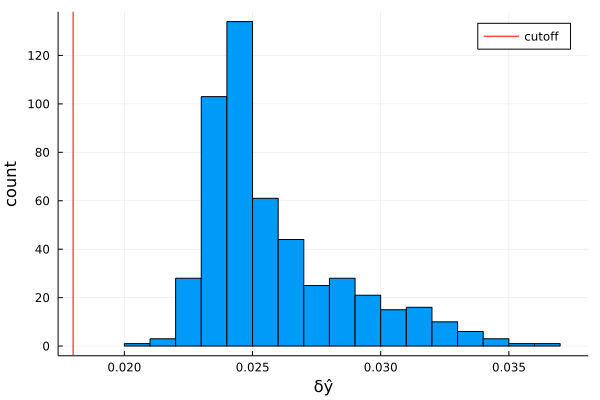

In [25]:
histogram(Measurements.uncertainty.(ŷ), label="")
vline!([0.018], color=:red, label="cutoff")
xlabel!("δŷ")
ylabel!("count")

perhaps more useful for establishing a cutoff is the relative ucnertainty 

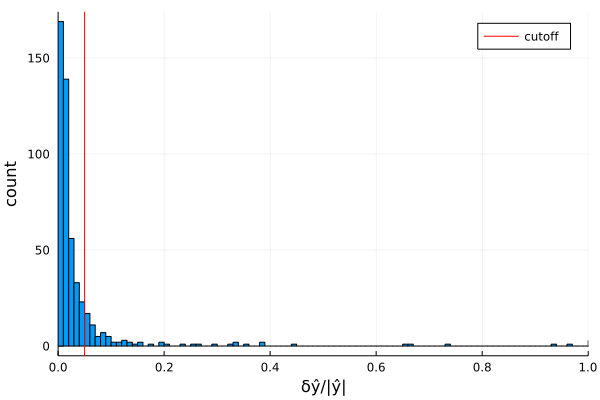

In [26]:
y_rel = Measurements.uncertainty.(ŷ) ./ abs.(Measurements.value.(ŷ))
y_rel[y_rel .> 1.0] .= 1.0
histogram(y_rel, xlims=(0.0, 1.0), label="")
vline!([0.05], color=:red, label="cutoff")
xlabel!("δŷ/|ŷ|")
ylabel!("count")

# Including full covariance matrix

There appears to be a function in `StatsBase.jl` that can compute the entire covariance matrix

In [29]:
Pkg.add("StatsBase")
using StatsBase

   Resolving package versions...
    Updating `~/gitRepos/AerialVehicle.jl/Project.toml`
  [2913bbd2] + StatsBase v0.33.13
  No Changes to `~/gitRepos/AerialVehicle.jl/Manifest.toml`


In [35]:
Xmat = MLJModelInterface.matrix(X)

500×5 Matrix{Float64}:
 -0.556027    0.963377    0.309717   0.226209   -1.068
 -0.444383    0.488466    0.700933  -0.910758    1.08852
  0.0271553   0.455962    0.332267  -1.80477    -0.371234
 -0.299484   -1.65575    -1.1501     0.0270858   0.264316
  1.77786    -1.97259    -0.199877  -0.510282    2.62277
 -1.1449     -0.516329   -0.693392  -1.45307     1.26869
 -0.468606   -3.02236     0.186594   0.416818   -0.975372
  0.156143   -0.938366   -0.95745   -0.8739      0.350112
 -2.64199    -0.80803     0.436618  -0.194363    0.886054
  1.00331     1.21038    -2.02603   -1.56408     0.417977
  1.08238    -0.396254    0.560561  -2.0684     -1.20323
  0.187028   -0.726274   -1.53502    2.3783     -0.161021
  0.518149   -1.57589     0.588874   1.54934     0.828911
  ⋮                                             
 -0.449783   -0.407314    0.785281   0.753477    0.503655
  0.600364    0.823373   -0.259577   0.957172   -0.835065
  0.787913    1.0619      1.32902   -1.42993     1.08928
  0.4768

In [50]:
Σˣ = StatsBase.cov(Xmat)

5×5 Matrix{Float64}:
  1.09649     0.0221186   -0.0680216    -0.0606619  -0.0979672
  0.0221186   1.04219     -0.00899701   -0.0403955  -0.0115171
 -0.0680216  -0.00899701   0.9269       -0.0177843  -0.000939509
 -0.0606619  -0.0403955   -0.0177843     1.01931    -0.0401891
 -0.0979672  -0.0115171   -0.000939509  -0.0401891   0.934647